***PROYECTO FINAL***

                                                    
El desperdicio alimentario se ha convertido en una preocupación a nivel mundial, y éste es generado en distintas etapas a lo largo de toda la cadena alimentaria, desde la producción primaria hasta el consumo. Por lo tanto, abordar el problema requiere actuar en todas esas etapas, tanto en la prevención como en la reutilización de los que se generen de forma inevitable.

A nivel mundial, se desperdician o pierden alrededor de un tercio de los alimentos que se producen. Las tasas más altas de desperdicio se sitúan en el 40–50% para tubérculos, frutas y hortalizas; 35% para pescado; 30% para cereales, y 20% para semillas oleaginosas, carne y productos lácteos. 

Mediante el uso de IA y un dataset especializado nos proponemos arrojar algo más de luz sobre este problema y advertir de las causas que pueden ocurrir 

Como se ha mencionado arriba el objetivo de este proyecto es predecir el gasto de comida que se producirá en un futuro, para ello utilizaremos el siguiente dataset de Kaggle, creado por Atharva Soundankar.

https://www.kaggle.com/datasets/atharvasoundankar/global-food-wastage-dataset-2018-2024

***Regresión***:

Para dar solución al problema se ha escogido la regresión, nuestro objetivo será concienciar de la magnitud del problema que representa el malgasto de comida usando los datos de país, año, población, categoría y cantidad de comida malgastada para poder predecir cuanto dinero se perdería a consecuencia de dicho malgasto.

Vamos a utilizar varios modelos de aprendizaje supervisado y así poder decidir cuales serán los que cuentan con predicciones más precisas, los modelos automáticos de aprendizaje supervisado son algoritmos que aprenden a partir de un conjunto de datos etiquetados, donde cada entrada tienen una salida conocida. El objetivo de estos modelos es que sean capaces de generar salidas correctas frente a entradas nunca vistas.

Respecto a los datos como hemos mencionado antes vamos a usar el dataset de "global_food_wastage_dataset.csv", este dataset por desgracia no aporta datos que se correspondan con la realidad ni entre ellos lo cual afectará al análisis que realizaremos acontinuación.

Antes de empezar a pensar en utilizarlo debemos limpiar todos aquellas filas que no contengan algún dato (dropna) o los que se encuentren duplicados (dropduplicates) con las funciones que nos ofrece la librería de pandas, acto segido vamos  eliminar las columnas de "Household Waste (%)" y "Avg Waste per Capita (Kg)" ya que son dos datos irrelevantes para el estudio de la pérdida económica ya que son datos que se calculan a partir de ella.

Una vez hemos terminado de limpiar el dataset es hora de empezar a adecuarlo para su uso utilizando la librería de sklearn.preprocessing, empezaremos por tratar los datos discretos como el país o la categoría de comida, para ello debemos convertir de texto a valores númericos, para ello utilizaremos LabelEncoding que nos permite codificar los datos en un rango de 0 a n_clases-1.

El siguiente paso que se suele realizar si se trabaja con datos de diferentes magnitudes es el de normalizar(Normalizer) o estandarizar(StandardScaler):

- Normalizar: Consiste en escalar los datos de la columna de manera que su norma sea 1, como no hemos especificado ninguna norma usamos de manera automática la norma L2 que divide el valor de la instancia entre la raíz cuadrada de la suma de los cuadrados de los elementos de la columna.

- Estandarizar: Consiste en estandarizar las características eliminando la media y escalando a la varianza unitaria.

En nuestro caso después de realizar estos dos procesos se observó que la precisión de los diferentes modelos utilizados se veía negativamente impactadas así que se decidió no utilizarlos a pesar de que si se deberían utilizar con los datos con los que estamos trabajando.

Después de adecuar nuestro dataset estamos listos para dividirlo en nuestros sets de entrenamiento y validación, haremos que el conjunto de validación sea un 35% de los datos totales, como datos de entrada tomaremos: el año, el país, la categoría de comida, la población y el malgasto total de comida en toneladas y nuestro output será el gasto económico en millones de dolares.
Para comparar los diferentes modelos vamos a usar dos medidas de precisión el cross_val_score y el r2_score.

In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, Normalizer

SEED = 42

# Carga del dataset
df = pd.read_csv('global_food_wastage_dataset.csv', encoding = 'utf-8')
# Eliminación de las filas que les falten algún dato
df = df.dropna()
# Eliminación de las filas duplicadas
df = df.drop_duplicates()
# Eliminamos aquellas columnas que contengan datos irrelevantes para el análisis
df = df.drop(columns=['Household Waste (%)', 'Avg Waste per Capita (Kg)'])

df = df.reset_index(drop=True)


label = LabelEncoder()

df['Country'] = label.fit_transform(df['Country'])
df['Food Category'] = label.fit_transform(df['Food Category'])


# Normalización 
"""normalizer = Normalizer()
columns_to_normalize = ['Total Waste (Tons)', 'Population (Million)', 'Economic Loss (Million $)']
df[columns_to_normalize] = normalizer.fit_transform(df[columns_to_normalize])
"""
# Stardardización
"""scaler = StandardScaler()
columns_to_scale = ['Total Waste (Tons)', 'Population (Million)', 'Economic Loss (Million $)']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
"""

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score

x_train, x_test, y_train, y_test = train_test_split(df[['Country', 'Year', 'Food Category', 'Total Waste (Tons)']].values, df['Economic Loss (Million $)'].values, test_size=0.35, random_state=SEED)


Todos los modelos que usaremos a continuación están sacados de la librería sklearn.

***Linear Regression***

La regresión lineal es un modelo estadístico que busca establecer una relación lineal entre una variable dependiente (target) y una o más variables independientes (features), por este motivo es un modelo que se adapta muy bien a nuestro problema.


In [18]:
from sklearn.linear_model import LinearRegression

# Cargamos el modelo
linearregression = LinearRegression()


# Entrenamos el modelo
linear_model = linearregression.fit(x_train, y_train)

# Calculamos la puntuación de precisión del modelo
score_linear = cross_val_score(linear_model, x_test, y_test, cv=5, n_jobs=-1)
score_r2_linear = r2_score(y_test, linear_model.predict(x_test))

print(f'Linear Regression Score: {score_linear.mean()}')
print(f'Linear Regression R2 Score: {score_r2_linear}')

Linear Regression Score: 0.9519099332349918
Linear Regression R2 Score: 0.9525900916291097


***Multi-Layer Perceptron (regression)***

El Perceptrón multicapa a diferencia del perceptrón estándar este estilo de perceptrón es capaz de resolver problemas más complejos o que son linealmente separables, el MLP es útil en este caso porque puede aprender patrones complejos en los datos de desperdicio alimentario y predecir valores continuos, como el total de desperdicio en toneladas o el gasto económico.

In [17]:
from sklearn.neural_network import MLPRegressor

# Cargamos el modelo
mlpregressor = MLPRegressor(hidden_layer_sizes = 3 ,random_state=SEED, max_iter=1000)

# Entrenamos el modelo
mlp_model = mlpregressor.fit(x_train, y_train)

#Calculamos la puntuación de precisión del modelo
score_mlp = cross_val_score(mlp_model, x_test, y_test, cv=5, n_jobs=-1)
score_r2_mlp = r2_score(y_test, mlp_model.predict(x_test))

print(f'MLP Regressor Score: {score_mlp.mean()}')
print(f'MLP Regressor R2 Score: {score_r2_mlp}')


MLP Regressor Score: 0.9519749757779635
MLP Regressor R2 Score: 0.9526904619734494


***K-Nearest Neighbors***

Es un algoritmo de aprendizaje supervisado que calcula la distancia entre los valores producidos por cada neighbor y toma el valor que se repita más entre todos, este modelo es especialmente útil cuando existen patrones locales en los datos que tienden a tener valores similares.

In [19]:
from sklearn.neighbors import KNeighborsRegressor

# Cargamos el modelo
kneighbors = KNeighborsRegressor(n_neighbors=15, algorithm='ball_tree', n_jobs=-1)

# Entrenamos el modelo
kneighbors_model = kneighbors.fit(x_train, y_train)

# Calculamos la puntuación de precisión del modelo
score_kneighbors = cross_val_score(kneighbors_model, x_test, y_test, cv=5, n_jobs=-1)
score_r2_kneighbors = r2_score(y_test, kneighbors_model.predict(x_test))

print(f"Kneighbors Regressor Score: {score_kneighbors.mean()}")
print(f"Kneighbors Regressor R2 Score: {score_r2_kneighbors}")

Kneighbors Regressor Score: 0.9485587292032374
Kneighbors Regressor R2 Score: 0.9488895830425075


***Ridge***

Ridge es una modificación del algoritmo de regresión lineal que hemos usado previamente, su particularidad es que la función de perdida es la función linear de mínimos cuadrados y la regularización con la norma L2 que, como hemos explicado antes, se trata de dividir cada elemento del vector por la raíz de la suma de los cuadrados de todos los elementos del vector.

In [22]:
from sklearn import linear_model as lm

# Cargamos el modelo
ridge = lm.Ridge(alpha=0.5)    

# Entrenamos el modelo
ridge_model = ridge.fit(x_train, y_train)

# Calculamos la puntuación de precisión del modelo
score_ridge = cross_val_score(ridge_model, x_test, y_test, cv=5, n_jobs=-1)
score_r2_ridge = r2_score(y_test, ridge_model.predict(x_test))

print(f'Ridge Regressor Score: {score_ridge.mean()}')
print(f'Ridge Regressor R2 Score: {score_r2_ridge}')

Ridge Regressor Score: 0.9519099465886587
Ridge Regressor R2 Score: 0.9525900968922789


***Lasso***

Como hemos visto arriba es una modificación de el modelo de regresión lineal, en este caso el modelo ha sido regularizado utilizando la norma de L1 (Manhattan), en esta se calcula la magnitud de un vector mediante la suma de los valores absolutos de sus componentes.

In [23]:
# Cargamos el modelo
lasso = lm.Lasso(alpha=0.5)

# Entrenamos el modelo
lasso_model = lasso.fit(x_train, y_train)

# Calculamos la puntuación de precisión del modelo
score_lasso = cross_val_score(lasso_model, x_test, y_test, cv=5, n_jobs=-1)
score_r2_lasso = r2_score(y_test, lasso_model.predict(x_test))

print(f'Lasso Regressor Score: {score_lasso.mean()}')
print(f'Lasso Regressor R2 Score: {score_r2_lasso}')

Lasso Regressor Score: 0.9519101560445729
Lasso Regressor R2 Score: 0.952590722278891


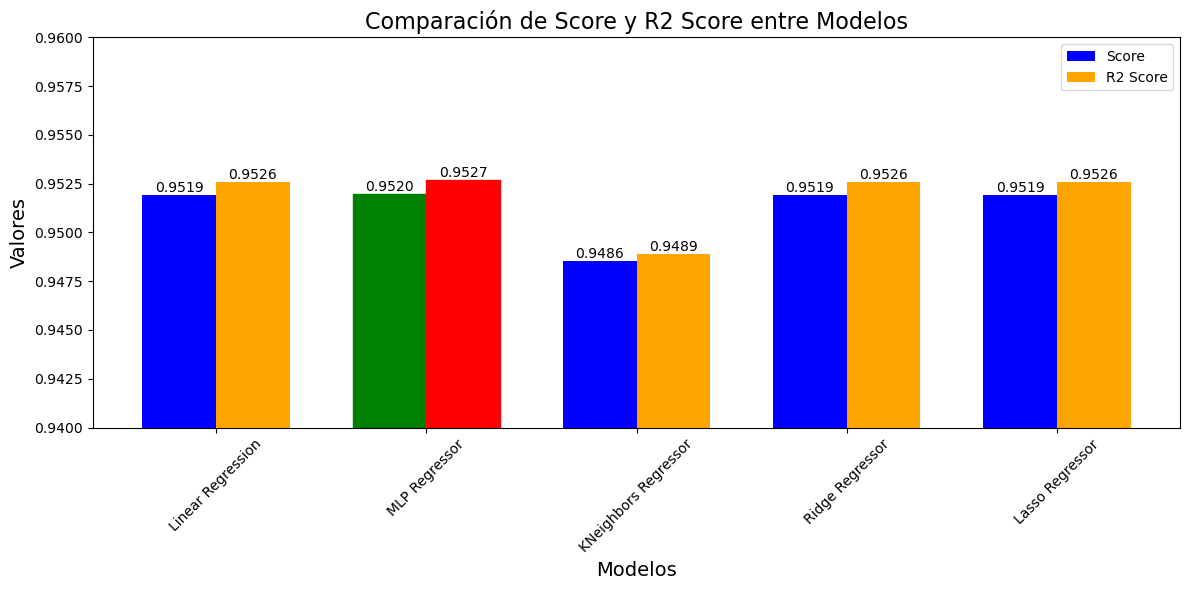

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Ejemplo de datos
models = ['Linear Regression', 'MLP Regressor', 'KNeighbors Regressor', 'Ridge Regressor', 'Lasso Regressor']
scores = [score_linear.mean(), score_mlp.mean(), score_kneighbors.mean(), score_ridge.mean(), score_lasso.mean()]
scores_r2 = [score_r2_linear, score_r2_mlp, score_r2_kneighbors, score_r2_ridge, score_r2_lasso]

# Configuración del gráfico
x = np.arange(len(models))  # Posiciones de las barras
width = 0.35  # Ancho de las barras

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(12, 6))
bars1 = plt.bar(x - width/2, scores, width, label='Score', color='blue')
bars2 = plt.bar(x + width/2, scores_r2, width, label='R2 Score', color='orange')

# Añadir etiquetas y títulos
plt.xticks(x, models, rotation=45)
plt.title('Comparación de Score y R2 Score entre Modelos', fontsize=16)
plt.xlabel('Modelos', fontsize=14)
plt.ylabel('Valores', fontsize=14)

# Reescalar el eje Y
plt.ylim(0.94, 0.96)

# Destacar el valor más alto
max_score = max(scores)
max_score_r2 = max(scores_r2)

for bar in bars1:
    height = bar.get_height()
    if height == max_score:
        bar.set_color('green')  # Cambiar el color de la barra más alta
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.4f}', ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    if height == max_score_r2:
        bar.set_color('red')  # Cambiar el color de la barra más alta
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.4f}', ha='center', va='bottom')

# Añadir leyenda para los colores destacados
plt.legend()

# Ajustar diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

Como podemos ver en la gráfica presentada previamente el único modelo que se queda algo rezagado

Para calcular el error de los diferentes modelos hemos decidido utilizar el método Root Mean Squared Error (RMSE) debido a que lo hemos estudiado en las clases y se adapta mucho mejor que otros métodos como el Precision Score o el Recall Score que no son aplicables aqui al ser objeto de evaluación valores continuos en vez de discretos. El método de Classification_report y Confussion Matrix sugeridos por la profesora no son aplicables en estos casos debido a que no funcionan con valores continuos, es decir, como nuestra predicción devuelve la cantidad de dinero que se pierde al año pero no la clasificamos en rangos (Poco, Moderado, Alto por ejemplo) no se pueden realizar ni el Classification_Report o plot_confusion_matrix (confusion_matrix en la version estable de sklearn).

In [9]:
#Vamos a evaluar un score más completo, para ello utilizaremos el Root Squared Error
from sklearn.metrics import root_mean_squared_error

rmse_score_linear = root_mean_squared_error(y_test, linear_model.predict(x_test))
rmse_score_mlp = root_mean_squared_error(y_test, mlp_model.predict(x_test))
rmse_score_kneighbors = root_mean_squared_error(y_test, kneighbors_model.predict(x_test))
rmse_score_ridge = root_mean_squared_error(y_test, ridge_model.predict(x_test))
rmse_score_lasso = root_mean_squared_error(y_test, lasso_model.predict(x_test))

rmse_values = {
    'Linear Regression': rmse_score_linear,
    'MLP Regressor': rmse_score_mlp,
    'KNeighbors Regressor': rmse_score_kneighbors,
    'Ridge Regressor': rmse_score_ridge,
    'Lasso Regressor': rmse_score_lasso
}

rmse_df = pd.DataFrame(list(rmse_values.items()), columns=['Model', 'RMSE'])
print(rmse_df)

                  Model         RMSE
0     Linear Regression  3238.734754
1         MLP Regressor  3235.304615
2  KNeighbors Regressor  3362.757388
3       Ridge Regressor  3238.734574
4       Lasso Regressor  3238.713213


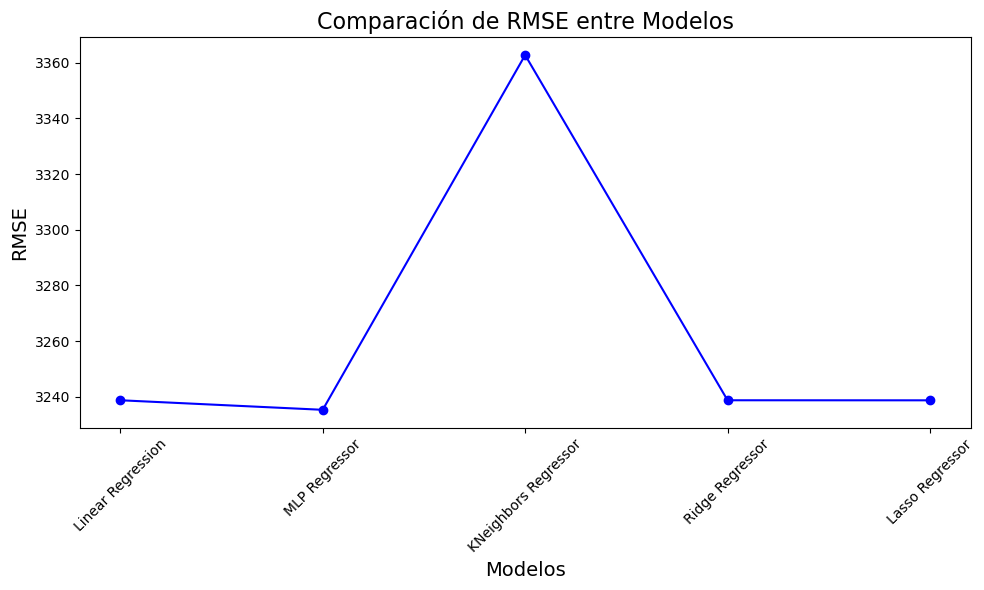

In [32]:
import matplotlib.pyplot as plt

# Ejemplo de datos
models = ['Linear Regression', 'MLP Regressor', 'KNeighbors Regressor', 'Ridge Regressor', 'Lasso Regressor']
rmse_values = [rmse_score_linear, rmse_score_mlp, rmse_score_kneighbors, rmse_score_ridge, rmse_score_lasso]

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(models, rmse_values, marker='o', linestyle='-', color='blue')

# Rotar los labels de la coordenada X
plt.xticks(rotation=45)

# Añadir títulos y etiquetas
plt.title('Comparación de RMSE entre Modelos', fontsize=16)
plt.xlabel('Modelos', fontsize=14)
plt.ylabel('RMSE', fontsize=14)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


Utilización de XAI

Vamos a utilizar lime la librería que proporcionó mejores resultados

Model: LinearRegression


Model: MLPRegressor


Model: KNeighborsRegressor


Model: Ridge


Model: Lasso


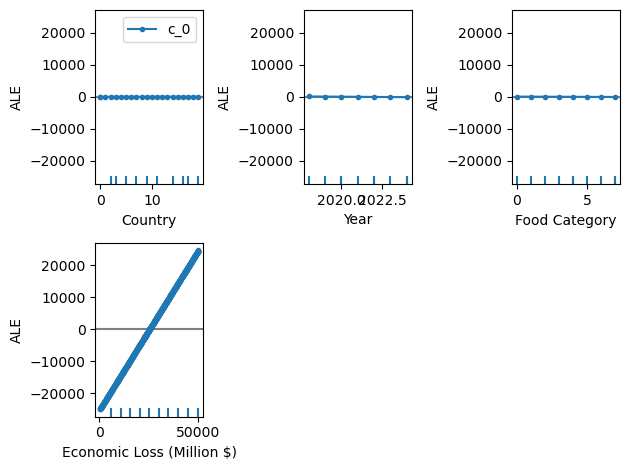

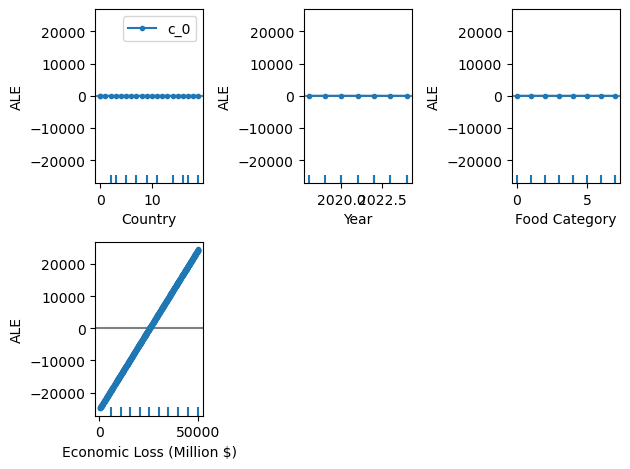

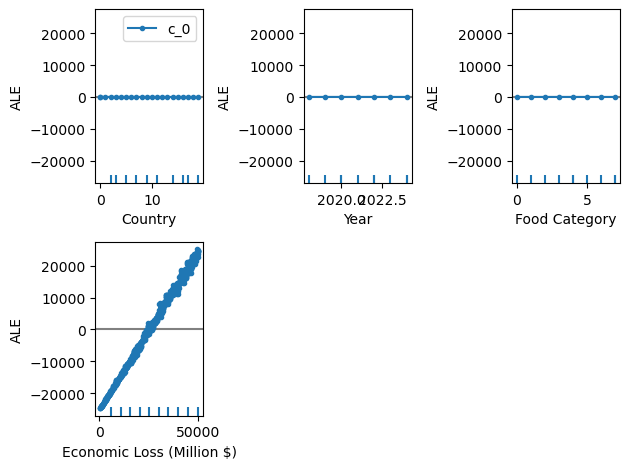

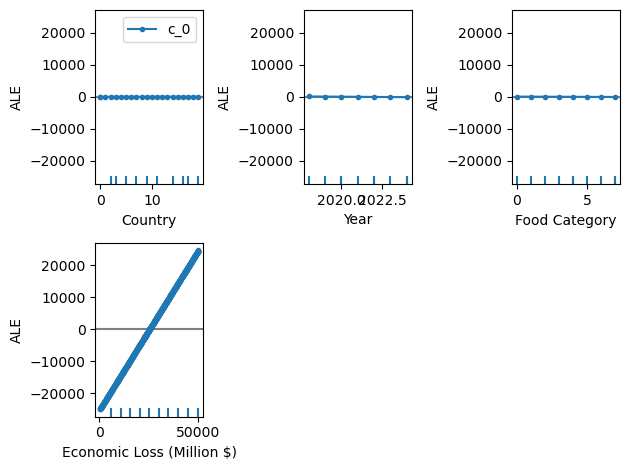

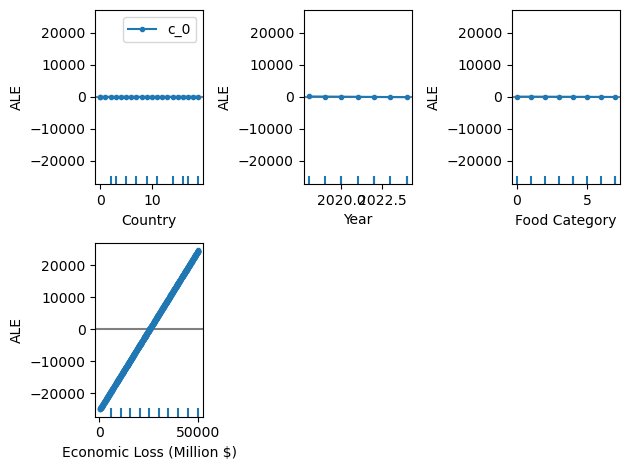

In [11]:
import lime
import alibi

from lime import lime_tabular
from alibi.explainers import ALE, plot_ale

explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    x_train,
    feature_names=['Country', 'Year', 'Food Category', 'Economic Loss (Million $)'],
    mode='regression'
)
instanceidx = 0
instance = x_test[instanceidx:instanceidx+1]

"""# obtenemos la explicacion
exp_lime = explainer_lime.explain_instance(
    instance.values[0],
    linear_model.predict,
    num_features=len(x_train.columns)
)"""
models = [linear_model, mlp_model, kneighbors_model, ridge_model, lasso_model]
for model in models:
    print(f"Model: {model.__class__.__name__}")
    exp_lime = explainer_lime.explain_instance(
        instance[0],
        model.predict,
        num_features=len(explainer_lime.feature_names)
    )
    exp_lime.show_in_notebook(show_table=True)
    
for model in models:
    
    ale_explainer = ALE(model.predict, feature_names=['Country', 'Year', 'Food Category', 'Economic Loss (Million $)'])
    ale_exp = ale_explainer.explain(x_train)

    plot_ale(ale_exp)
